# IS 362 - Week 8 Assignment

To begin, I will import the pandas, numpy, seaborn, and matplotlib modules.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import csv
import matplotlib.pyplot as plot
from pandas import DataFrame, Series

# Enable inline plotting
%matplotlib inline

sns.set()
sns.set_style("white")

Set some pandas options for controlling output display.

In [2]:
pd.set_option('display.max_columns', 10)
pd.set_option('display.max_rows', 10)

Create the column names Series.

In [3]:
col_names = Series(['MPG', 
             'Cylinders', 
             'Displacement', 
             'Horsepower', 
             'Weight', 
             'Acceleration', 
             'Model-Year', 
             'Origin', 
             'Car-Name'])

Read the auto-mpg.txt file and create a DataFrame.

In [4]:
Location = r'D:\Projects\Educational\IS362\week-8\auto-mpg.txt'

mpgfwf = pd.read_fwf(Location, header=None, names=col_names)
mpgfwf

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model-Year,Origin,Car-Name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,"""chevrolet chevelle malibu"""
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,"""buick skylark 320"""
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,"""plymouth satellite"""
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,"""amc rebel sst"""
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,"""ford torino"""
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.00,2790.0,15.6,82,1,"""ford mustang gl"""
394,44.0,4,97.0,52.00,2130.0,24.6,82,2,"""vw pickup"""
395,32.0,4,135.0,84.00,2295.0,11.6,82,1,"""dodge rampage"""
396,28.0,4,120.0,79.00,2625.0,18.6,82,1,"""ford ranger"""


Then create a copy of the DataFrame.

In [5]:
mpg_cp = mpgfwf.copy()

Get the median horsepower to replace '?' values in the 'Horsepower' column and normalize the data set.

In [6]:
mpg_cp['Horsepower'].replace('?', np.nan, inplace=True)
mpg_cp.fillna(mpg_cp['Horsepower'].median(), inplace=True)
mpg_cp

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model-Year,Origin,Car-Name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,"""chevrolet chevelle malibu"""
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,"""buick skylark 320"""
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,"""plymouth satellite"""
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,"""amc rebel sst"""
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,"""ford torino"""
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.00,2790.0,15.6,82,1,"""ford mustang gl"""
394,44.0,4,97.0,52.00,2130.0,24.6,82,2,"""vw pickup"""
395,32.0,4,135.0,84.00,2295.0,11.6,82,1,"""dodge rampage"""
396,28.0,4,120.0,79.00,2625.0,18.6,82,1,"""ford ranger"""


Create a dictionary to map new values for the 'Origin' column.

In [7]:
o_vals_int = mpg_cp.Origin
o_vals_str = {1: 'USA', 2: 'Europe', 3: 'Asia'}
o_vals_str = o_vals_int.map(o_vals_str)
#new = o_vals_int.map(o_vals_str)
mpg_cp['Origin'] = o_vals_str
mpg_cp

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model-Year,Origin,Car-Name
0,18.0,8,307.0,130.0,3504.0,12.0,70,USA,"""chevrolet chevelle malibu"""
1,15.0,8,350.0,165.0,3693.0,11.5,70,USA,"""buick skylark 320"""
2,18.0,8,318.0,150.0,3436.0,11.0,70,USA,"""plymouth satellite"""
3,16.0,8,304.0,150.0,3433.0,12.0,70,USA,"""amc rebel sst"""
4,17.0,8,302.0,140.0,3449.0,10.5,70,USA,"""ford torino"""
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.00,2790.0,15.6,82,USA,"""ford mustang gl"""
394,44.0,4,97.0,52.00,2130.0,24.6,82,Europe,"""vw pickup"""
395,32.0,4,135.0,84.00,2295.0,11.6,82,USA,"""dodge rampage"""
396,28.0,4,120.0,79.00,2625.0,18.6,82,USA,"""ford ranger"""


Create a histogram to demonstrate the distribution of cylinders

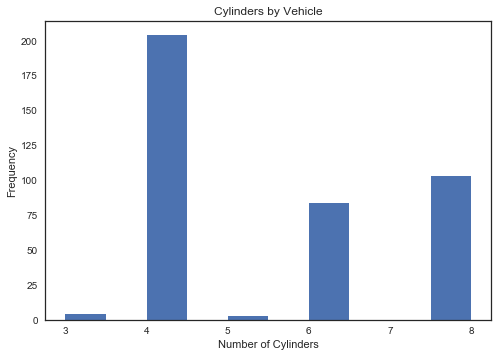

In [8]:
mpg_cp['Cylinders'].plot.hist(title='Cylinders by Vehicle')
plot.xlabel('Number of Cylinders')

Create a scatter plot to show the relationship between horsepower and weight.

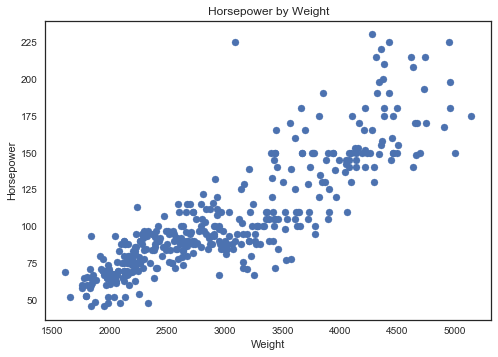

In [16]:
plot.scatter(mpg_cp.Weight, mpg_cp.Horsepower)
plot.title('Horsepower by Weight')
plot.xlabel('Weight')
plot.ylabel('Horsepower')